<a href="https://colab.research.google.com/github/jubair231dd/Heart-Failure/blob/main/Heart_Failure_Logistic_Regression_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
X

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [6]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
X_train

array([[ 45.,   1.,  66., ...,   1.,   0., 230.],
       [ 82.,   1., 855., ...,   0.,   0.,  30.],
       [ 70.,   1.,  59., ...,   0.,   0.,  85.],
       ...,
       [ 85.,   1., 102., ...,   0.,   0.,  94.],
       [ 60.,   0., 582., ...,   1.,   1.,  40.],
       [ 70.,   1., 171., ...,   1.,   1., 146.]])

In [9]:
X_test

array([[4.0000000e+01, 1.0000000e+00, 1.0100000e+02, 0.0000000e+00,
        4.0000000e+01, 0.0000000e+00, 2.2600000e+05, 8.0000000e-01,
        1.4100000e+02, 0.0000000e+00, 0.0000000e+00, 1.8700000e+02],
       [6.0667000e+01, 1.0000000e+00, 1.5100000e+02, 1.0000000e+00,
        4.0000000e+01, 1.0000000e+00, 2.0100000e+05, 1.0000000e+00,
        1.3600000e+02, 0.0000000e+00, 0.0000000e+00, 1.7200000e+02],
       [4.5000000e+01, 1.0000000e+00, 9.8100000e+02, 0.0000000e+00,
        3.0000000e+01, 0.0000000e+00, 1.3600000e+05, 1.1000000e+00,
        1.3700000e+02, 1.0000000e+00, 0.0000000e+00, 1.1000000e+01],
       [5.5000000e+01, 0.0000000e+00, 5.8200000e+02, 1.0000000e+00,
        3.5000000e+01, 1.0000000e+00, 3.7100000e+05, 7.0000000e-01,
        1.4000000e+02, 0.0000000e+00, 0.0000000e+00, 1.9700000e+02],
       [7.0000000e+01, 0.0000000e+00, 2.3200000e+02, 0.0000000e+00,
        3.0000000e+01, 0.0000000e+00, 1.7300000e+05, 1.2000000e+00,
        1.3200000e+02, 1.0000000e+00, 0.0000

In [10]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1])

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train

array([[-1.3679055 ,  1.12366644, -0.51861616, ...,  0.74535599,
        -0.66022529,  1.31786894],
       [ 1.80097544,  1.12366644,  0.29392003, ..., -1.34164079,
        -0.66022529, -1.2935039 ],
       [ 0.77323027,  1.12366644, -0.52582497, ..., -1.34164079,
        -0.66022529, -0.57537637],
       ...,
       [ 2.05791174,  1.12366644, -0.48154226, ..., -1.34164079,
        -0.66022529, -0.45786459],
       [-0.08322404, -0.88994382,  0.01277633, ...,  0.74535599,
         1.51463449, -1.16293526],
       [ 0.77323027,  1.12366644, -0.41048396, ...,  0.74535599,
         1.51463449,  0.22109235]])

In [13]:
X_test

array([[-1.79613265e+00,  1.12366644e+00, -4.82572091e-01,
        -8.73944808e-01,  1.69459133e-01, -7.74596669e-01,
        -4.02104150e-01, -5.97380728e-01,  9.72673008e-01,
        -1.34164079e+00, -6.60225292e-01,  7.56423780e-01],
       [-2.60985333e-02,  1.12366644e+00, -4.31080571e-01,
         1.14423702e+00,  1.69459133e-01,  1.29099445e+00,
        -6.50092806e-01, -3.84624097e-01, -1.11300891e-01,
        -1.34164079e+00, -6.60225292e-01,  5.60570817e-01],
       [-1.36790550e+00,  1.12366644e+00,  4.23678665e-01,
        -8.73944808e-01, -6.95207057e-01, -7.74596669e-01,
        -1.29486331e+00, -2.78245781e-01,  1.05493888e-01,
         7.45355992e-01, -6.60225292e-01, -1.54158432e+00],
       [-5.11451190e-01, -8.89943818e-01,  1.27763335e-02,
         1.14423702e+00, -2.62873962e-01,  1.29099445e+00,
         1.03623005e+00, -7.03759043e-01,  7.55878228e-01,
        -1.34164079e+00, -6.60225292e-01,  8.86992422e-01],
       [ 7.73230273e-01, -8.89943818e-01, -3.4766430

## Training the Logistic Regression model on the Training set

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [22]:
print(classifier.predict(sc.transform([[45,0,615,1,55,0,222000,0.8,141,0,0,257]])))

[0]


## Predicting the Test set results

In [17]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [18]:
classifier.score(X_test, y_test)

0.7733333333333333

## Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test,y_pred)


[[44  4]
 [13 14]]


0.7733333333333333

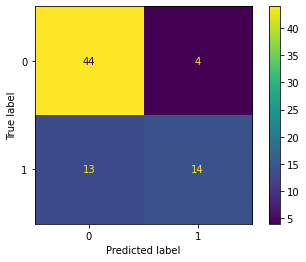

In [20]:
ConfusionMatrixDisplay(cm).plot()